In [76]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [77]:
# Read in data 
dataset = pd.read_csv('BTCData.csv')
# Reduce noise in the data by selecting data from every 10 seconds
dataset = dataset.iloc[::40, :].reset_index(drop=True)

In [78]:
# Create a price column which is average of highest bid and lowest ask
dataset['price'] = (dataset['2'] + dataset['22']) / 2
dataset['next_price'] = dataset['price'].shift(-1)

In [79]:
# Calculate the percentage change in price
dataset['price_change_pct'] = dataset['price'].pct_change()
dataset['next_pct'] = dataset['price_change_pct'].shift(-1)

In [80]:
# Drop NaN values that result from the pct_change calculation
dataset.dropna(inplace=True)

In [81]:
dataset = dataset.iloc[:, 3:]

In [82]:
dataset.head()

,2,3,4,5,6,7,8,9,10,11,...,36,37,38,39,40,41,price,next_price,price_change_pct,next_pct
1,17181.6,28.568,17181.5,1.556,17181.4,6.196,17181.2,0.017,17181.1,3.776,...,17182.4,10.011,17182.5,1.938,17182.6,2.170,17181.65,17182.65,0.000000,0.000058
2,17182.6,35.979,17182.5,8.536,17182.4,3.007,17182.3,1.131,17182.2,3.280,...,17183.4,0.151,17183.5,2.591,17183.6,0.005,17182.65,17185.25,0.000058,0.000151
3,17185.2,17.576,17185.1,1.066,17185.0,2.711,17184.9,0.004,17184.8,0.071,...,17186.0,0.028,17186.1,0.001,17186.2,0.657,17185.25,17185.25,0.000151,0.000000
4,17185.2,3.276,17185.1,1.026,17185.0,0.201,17184.9,3.052,17184.8,0.585,...,17186.0,0.955,17186.1,1.530,17186.2,1.020,17185.25,17185.25,0.000000,0.000000
5,17185.2,10.378,17185.1,1.396,17185.0,1.516,17184.9,3.083,17184.8,0.038,...,17186.0,1.519,17186.1,3.345,17186.2,2.198,17185.25,17185.25,0.000000,0.000000


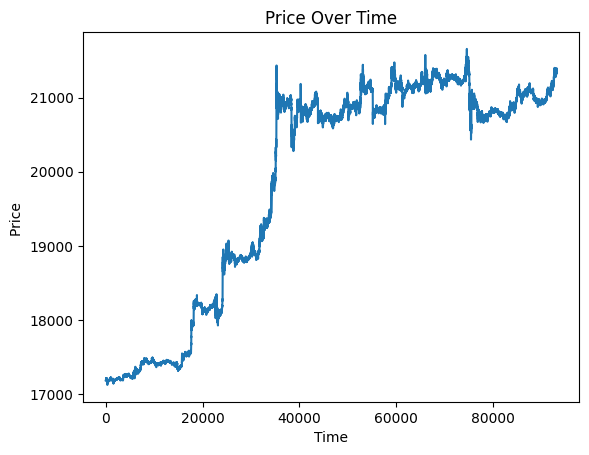

In [83]:
# Plot price over time
plt.plot(dataset['price'])
plt.xlabel('Time')
plt.ylabel('Price ')
plt.title('Price Over Time')

# Show the plot
plt.show()

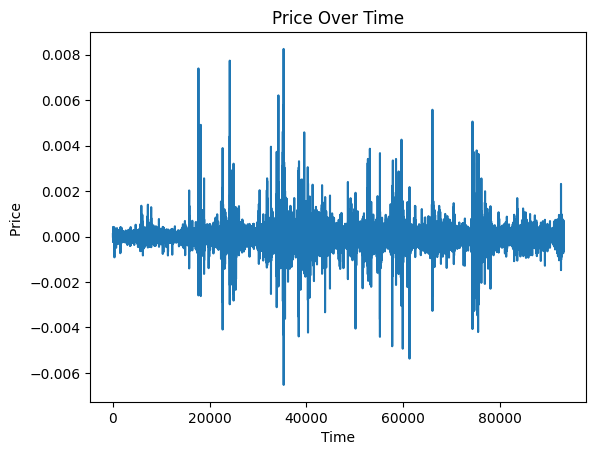

In [84]:
# Plot price over time
plt.plot(dataset['price_change_pct'])
plt.xlabel('Time')
plt.ylabel('Price ')
plt.title('Price Over Time')

# Show the plot
plt.show()

In [85]:
# Split the dataset into train and test for evaluation
train_size = int(len(dataset) * 0.8)
train, test = dataset[0:train_size], dataset[train_size:]

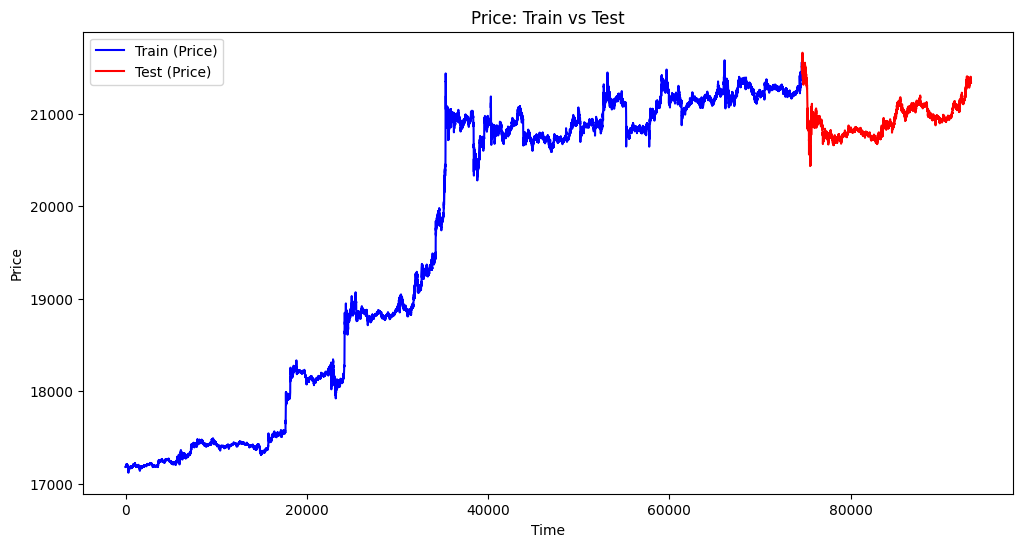

In [86]:
# Plot for Price
plt.figure(figsize=(12, 6))
plt.plot(train['price'], color='blue', label='Train (Price)')
plt.plot(test['price'], color='red', label='Test (Price)')
plt.title('Price: Train vs Test')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

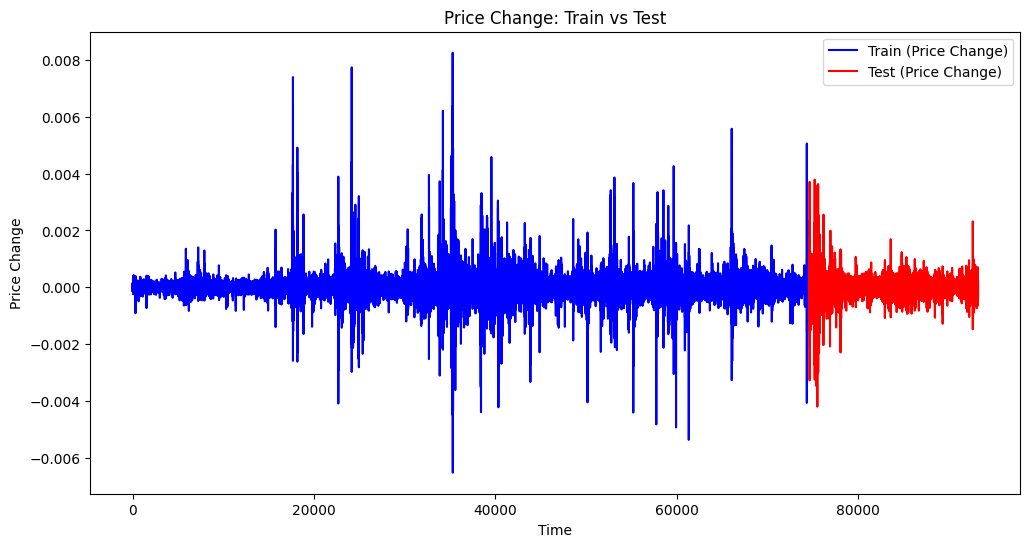

In [87]:
# Plot for Price Change
plt.figure(figsize=(12, 6))
plt.plot(train['price_change_pct'], color='blue', label='Train (Price Change)')
plt.plot(test['price_change_pct'], color='red', label='Test (Price Change)')
plt.title('Price Change: Train vs Test')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()
plt.show()

In [88]:
from pmdarima import auto_arima
# Auto ARIMA for price change
auto_model_price_change = auto_arima(train['next_pct'], trace=True)
print(auto_model_price_change.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-989029.950, Time=27.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-989012.924, Time=3.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-989015.083, Time=4.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-989014.928, Time=5.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-989008.121, Time=0.81 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-989059.695, Time=20.57 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-989035.244, Time=8.16 sec


/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-989008.849, Time=6.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-989101.724, Time=9.23 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-989103.359, Time=12.05 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-989101.432, Time=19.69 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-989099.495, Time=50.70 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-989099.242, Time=5.77 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 174.139 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                74616
Model:               SARIMAX(0, 0, 3)   Log Likelihood              494556.679
Date:                Sat, 02 Dec 2023   AIC                        -989103.359
Time:                        17:42:16   BIC                        -989057.258
Sample:                             0   HQIC                       -989089.182
                              

In [89]:
# Forecast and evaluate
auto_arima_price_change_predictions = auto_model_price_change.predict(n_periods=len(test))
mae_auto_arima_price_change = mean_absolute_error(test['next_pct'], auto_arima_price_change_predictions)
print('Auto ARIMA Model MAE on Price Percentage Change:', mae_auto_arima_price_change)

Auto ARIMA Model MAE on Price Percentage Change: 0.00016456931924582725


/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


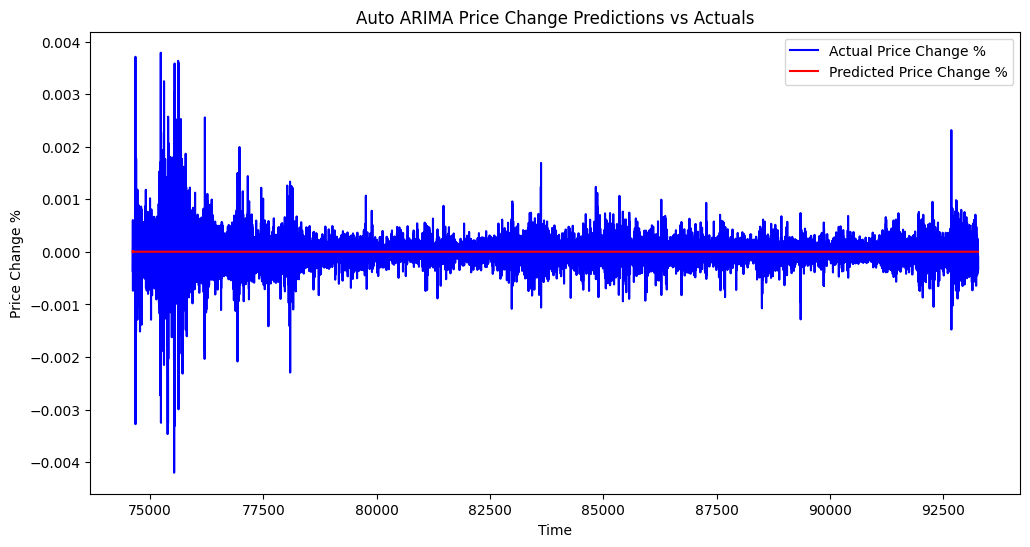

In [90]:
# Graph price change actuals vs test
plt.figure(figsize=(12, 6))
plt.plot(test['next_pct'], label='Actual Price Change %', color='blue')
plt.plot(auto_arima_price_change_predictions, label='Predicted Price Change %', color='red')
plt.title('Auto ARIMA Price Change Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

In [91]:
# Auto ARIMA for price 
auto_model_price = auto_arima(train['next_price'], trace=True)
print(auto_model_price.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=490359.498, Time=23.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=490515.087, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=490513.935, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=490514.055, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=490519.054, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=490454.563, Time=9.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=490456.391, Time=8.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=490423.694, Time=27.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=490423.665, Time=40.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=490483.281, Time=8.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=490430.618, Time=5.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=490431.254, Time=4.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=490362.202, Time=44.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=490363.038, Time=5.92 sec



In [92]:
# Forecast and evaluate
auto_arima_price_predictions = auto_model_price.predict(n_periods=len(test))
mae_auto_arima_price = mean_absolute_error(test['next_price'], auto_arima_price_predictions)
print('Auto ARIMA Model MAE on Price:', mae_auto_arima_price)

Auto ARIMA Model MAE on Price:

/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/miniconda3/envs/tensorflow_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 1101.953663217055


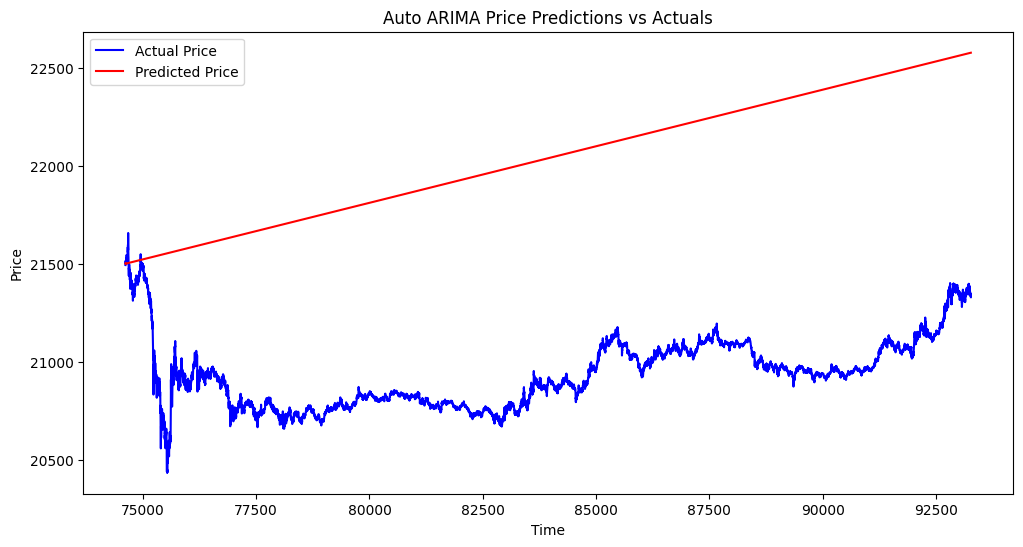

In [93]:
# Graph price actuals vs predictions
plt.figure(figsize=(12, 6))
plt.plot(test['next_price'], label='Actual Price', color='blue')
plt.plot(auto_arima_price_predictions, label='Predicted Price', color='red')
plt.title('Auto ARIMA Price Predictions vs Actuals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [94]:
# Extract features (excluding 'price_change_pct' and 'price')
features = dataset.drop(['next_pct'], axis=1).values

# Extract target variable ('price')
target = dataset['next_pct'].values.reshape(-1, 1)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Set the split point for training and validation
train_size = int(len(features) * 0.8)  # 80% for training

# Split the dataset into training, validation, and testing sets
X_train, X_val, X_test = (
    features_scaled[:train_size],
    features_scaled[train_size:train_size + int(0.1 * len(features))],  # 10% for validation
    features_scaled[train_size + int(0.1 * len(features)):],
)

y_train, y_val, y_test = (
    target[:train_size],
    target[train_size:train_size + int(0.1 * len(target))],
    target[train_size + int(0.1 * len(target)):],
)

# Reshape the input data for LSTM (assuming a time series structure)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# Build the LSTM model
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(16))
model.add(Dense(1))  # Output layer with one neuron for predicting 'price'

# Compile the model
optimizer = Adam(learning_rate=0.00005)


model.compile(optimizer=optimizer, loss='mae')  # Mean Absolute Error is used for regression problems

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Train the model with validation data
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {loss}')

# Make predictions on the test set
predictions = model.predict(X_test)

Epoch 1/30


2023-12-02 17:45:23.730857: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1166/1166 [==============================] - 10s 8ms/step - loss: 0.0058 - val_loss: 5.1013e-04
Epoch 2/30
1166/1166 [==============================] - 9s 8ms/step - loss: 3.8347e-04 - val_loss: 3.4484e-04
Epoch 3/30
1166/1166 [==============================] - 9s 8ms/step - loss: 2.8456e-04 - val_loss: 2.7851e-04
Epoch 4/30
1166/1166 [==============================] - 9s 7ms/step - loss: 2.6233e-04 - val_loss: 3.1161e-04
Epoch 5/30
1166/1166 [==============================] - 8s 7ms/step - loss: 2.5968e-04 - val_loss: 2.6312e-04
Epoch 6/30
1166/1166 [==============================] - 9s 7ms/step - loss: 2.5192e-04 - val_loss: 2.5909e-04
Epoch 7/30
1166/1166 [==============================] - 9s 7ms/step - loss: 2.5181e-04 - val_loss: 2.5942e-04
Epoch 8/30
1166/1166 [==============================] - 9s 7ms/step - loss: 2.4778e-04 - val_loss: 3.0549e-04
Epoch 9/30
1166/1166 [==============================] - 9s 7ms/step - loss: 2.4796e-04 - val_loss: 2.4727e-04
Epoch 10/30
1166/1166 [=

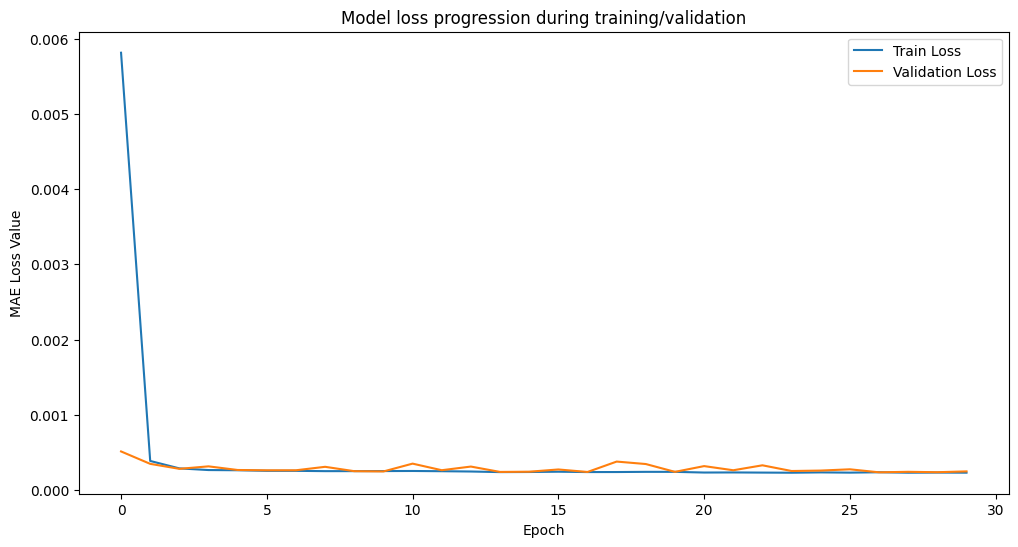

In [95]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training/validation')
plt.ylabel('MAE Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

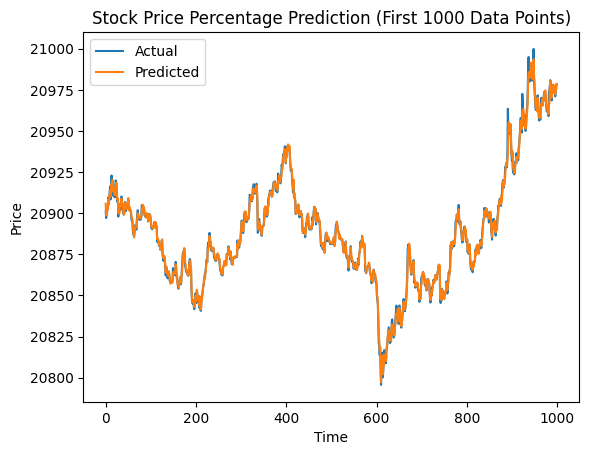

In [100]:
# Plotting the actual values for the first 100 data points
plt.plot(y_test[:1000], label='Actual')

# Plotting the predicted values for the first 100 data points
plt.plot(predictions[:1000], label='Predicted')

plt.title('Stock Price Percentage Prediction (First 1000 Data Points)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [97]:
# LSTM Price
# Extract features (excluding 'price_change_pct' and 'price')
features = dataset.drop(['next_price'], axis=1).values

# Extract target variable ('price')
target = dataset['next_price'].values.reshape(-1, 1)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Set the split point for training and validation
train_size = int(len(features) * 0.8)  # 80% for training

# Split the dataset into training, validation, and testing sets
X_train, X_val, X_test = (
    features_scaled[:train_size],
    features_scaled[train_size:train_size + int(0.1 * len(features))],  # 10% for validation
    features_scaled[train_size + int(0.1 * len(features)):],
)

y_train, y_val, y_test = (
    target[:train_size],
    target[train_size:train_size + int(0.1 * len(target))],
    target[train_size + int(0.1 * len(target)):],
)

# Reshape the input data for LSTM (assuming a time series structure)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  # Output layer with one neuron for predicting 'price'

# Compile the model

model.compile(optimizer='adam', loss='mae')  # Mean Absolute Error is used for regression problems

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Train the model with validation data
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {loss}')

# Make predictions on the test set
predictions = model.predict(X_test)

Epoch 1/100
1166/1166 [==============================] - 9s 7ms/step - loss: 16677.5625 - val_loss: 12354.3311
Epoch 2/100
1166/1166 [==============================] - 8s 7ms/step - loss: 4128.9092 - val_loss: 690.4596
Epoch 3/100
1166/1166 [==============================] - 8s 7ms/step - loss: 231.8089 - val_loss: 78.1411
Epoch 4/100
1166/1166 [==============================] - 8s 7ms/step - loss: 128.3759 - val_loss: 83.5939
Epoch 5/100
1166/1166 [==============================] - 8s 7ms/step - loss: 107.4357 - val_loss: 80.2633
Epoch 6/100
1166/1166 [==============================] - 8s 7ms/step - loss: 81.6952 - val_loss: 57.3940
Epoch 7/100
1166/1166 [==============================] - 8s 7ms/step - loss: 43.7573 - val_loss: 40.8887
Epoch 8/100
1166/1166 [==============================] - 8s 7ms/step - loss: 28.2689 - val_loss: 17.5436
Epoch 9/100
1166/1166 [==============================] - 8s 7ms/step - loss: 19.0957 - val_loss: 10.0025
Epoch 10/100
1166/1166 [===================

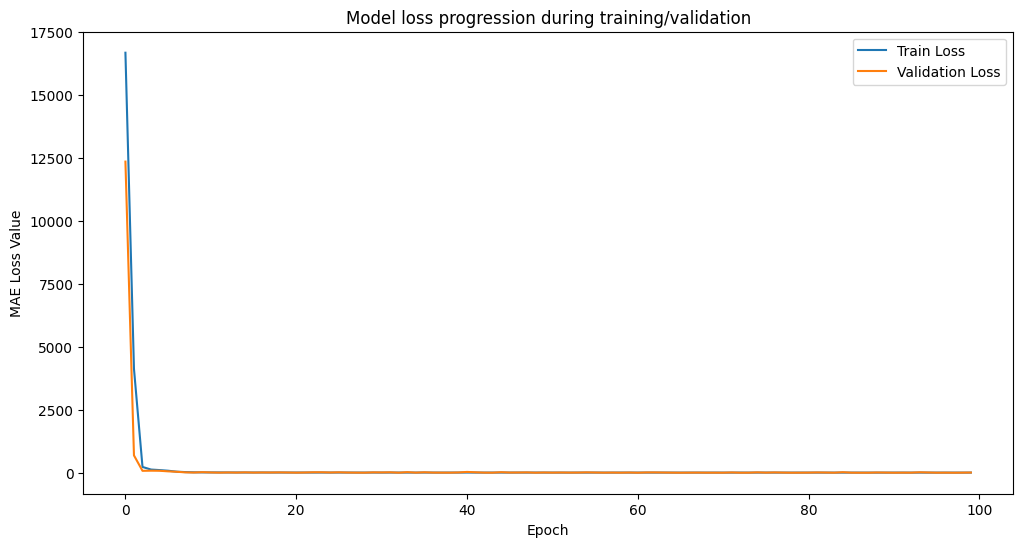

In [98]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training/validation')
plt.ylabel('MAE Loss Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

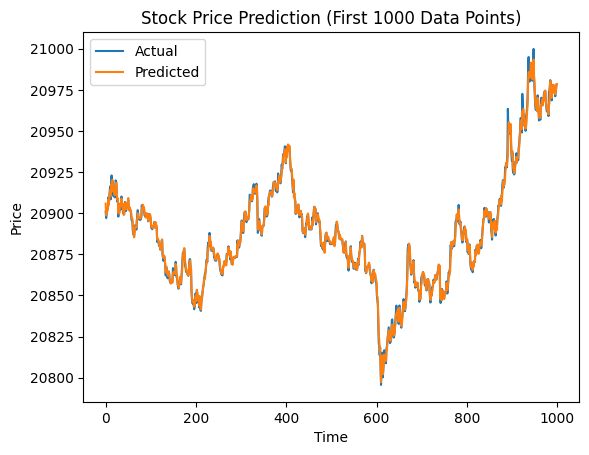

In [99]:
# Plotting the actual values for the first 100 data points
plt.plot(y_test[:1000], label='Actual')

# Plotting the predicted values for the first 100 data points
plt.plot(predictions[:1000], label='Predicted')

plt.title('Stock Price Prediction (First 1000 Data Points)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
